In [1]:
#import
import os 
import pandas as pd
import torch 
import IPython.display as ipd
import matplotlib.pyplot as plt
import random

from model import BirdAudioClassifier
from utils import *


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [2]:
### Testing the model 
num_bird_classes = 88
model = BirdAudioClassifier(num_classes=num_bird_classes).to(device)

In [3]:
#load the trained model 
model.load_state_dict(torch.load('Models\model1.pth'))
model.eval()

BirdAudioClassifier(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (max_pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=411648, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=88, bias=True)
)

In [39]:
'''
To do
- class (called BirdClassifier) that can be initialized with a certain model (by passing in the model) 
and then the path to an audio file can be passed into a function called predict_bird_species. 
The class then processes the audio, uses the model to predict the class and looks up the bird name associated to the class id 
and returns the bird name + (not sure) the confidence/percentage of the the prediction

'''
#rename to BirdAudioClassifier and rename model BirdAudioClassifierModel or BirdAudioClassifierCNN
class BirdAudioClassifier: 
    def __init__(self, model, confidence_threshold=0.5): 
        #get the device 
        self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        #move the model to the device and set it to evaluation 
        self.model = model.to(self.device)
        self.model.eval()

        #set the confidence threshold of a prediction 
        self.confidence_threshold = confidence_threshold
        

    def predict(self, spectrogram): 
        #reshape the tensor (to add the batch dimension) and move the tensor to the GPU 
        input = spectrogram.unsqueeze(0).to(self.device)

        #use torch.no_grad() for more efficiency by avoiding gradient computations 
        with torch.no_grad(): 
            #make the pridiction using the model (this gives the raw logists)
            prediction = self.model(input)
        
        #convert the raw logits to probabilities so that the classifier can give a confidence 
        prediction_probs = F.softmax(predicted_class, dim=1)

        #get the predicted class (the index with the largest logist value)
        predicted_class = torch.argmax(prediction, dim=1).item() 
        #get the confidence value 
        prediction_confidence = prediction_probs[0, predicted_class_index].item()

        #if the confidence is to low, the sound is not from a bird 
        if prediction_confidence < self.confidence_threshold: 
            predicted_class = None 
            prediction_confidence = 0
            
        return predicted_class, prediction_confidence
        

        
        
                




'\nTo do\n- class (called BirdClassifier) that can be initialized with a certain model (by passing in the model) \nand then the path to an audio file can be passed into a function called predict_bird_species. \nThe class then processes the audio, uses the model to predict the class and looks up the bird name associated to the class id \nand returns the bird name + (not sure) the confidence/percentage of the the prediction\n\n'

In [4]:
#load metadata df 
current_dir = os.getcwd() 
file_name = "Dataset\\metadata.csv"
file_path = os.path.join(current_dir, file_name) 
df_metadata = pd.read_csv(file_path)
display(df_metadata)

#create dictionary with id to name mapping 
id_to_name_dict = dict(zip(df_metadata["class_id"], df_metadata["english_cname"]))
print(id_to_name_dict)

,file_id,original_file_id,english_cname,path,class_id
0,1,101371,Long-tailed Tit,C:\Users\bensa\Documents\Aberdeen University\U...,0
1,2,101371,Long-tailed Tit,C:\Users\bensa\Documents\Aberdeen University\U...,0
2,3,101371,Long-tailed Tit,C:\Users\bensa\Documents\Aberdeen University\U...,0
3,4,101371,Long-tailed Tit,C:\Users\bensa\Documents\Aberdeen University\U...,0
4,5,101371,Long-tailed Tit,C:\Users\bensa\Documents\Aberdeen University\U...,0
...,...,...,...,...,...
3543,3544,99937,Eurasian Nuthatch,C:\Users\bensa\Documents\Aberdeen University\U...,75
3544,3545,99937,Eurasian Nuthatch,C:\Users\bensa\Documents\Aberdeen University\U...,75
3545,3546,99937,Eurasian Nuthatch,C:\Users\bensa\Documents\Aberdeen University\U...,75
3546,3547,99937,Eurasian Nuthatch,C:\Users\bensa\Documents\Aberdeen University\U...,75


{0: 'Long-tailed Tit', 1: 'Eurasian Golden Oriole', 2: 'Wood Warbler', 3: 'Lesser Whitethroat', 4: 'Common Starling', 5: 'Eurasian Collared Dove', 6: 'Common Reed Bunting', 7: 'Common Linnet', 8: 'Yellowhammer', 9: 'Western Yellow Wagtail', 10: 'Wood Sandpiper', 11: 'Garden Warbler', 12: 'Spotted Flycatcher', 13: 'Goldcrest', 14: 'Eurasian Wryneck', 15: 'Common Redshank', 16: 'River Warbler', 17: 'European Honey Buzzard', 18: 'Eurasian Bullfinch', 19: 'Rock Dove', 20: 'Dunlin', 21: 'African Pied Wagtail', 22: 'Sedge Warbler', 23: 'Eurasian Magpie', 24: 'Redwing', 25: 'Common Pheasant', 26: 'Common Chaffinch', 27: 'Willow Warbler', 28: 'Western Jackdaw', 29: 'Common Chiffchaff', 30: 'Great Tit', 31: 'Corn Bunting', 32: 'Eurasian Skylark', 33: 'Common Nightingale', 34: 'European Greenfinch', 35: 'Eurasian Reed Warbler', 36: 'European Herring Gull', 37: 'Eurasian Jay', 38: 'Common Blackbird', 39: 'Black-headed Gull', 40: 'Willow Ptarmigan', 41: 'Eurasian Treecreeper', 42: 'Black Woodpecke

In [5]:
#open a random audio file 

#generate random number in range 
index = random.randint(0, len(df_metadata))
# index = 620 #for testing
print(index)

#get the path of the item at the specified index
audio_file_path = df_metadata.loc[index, "path"]
#get the class id 
class_id = df_metadata.loc[index, "class_id"]
#get the english bird name 
name = df_metadata.loc[index, "english_cname"]

#get the spectrogram 
waveform, sample_rate = AudioUtil.open_file(audio_file_path)        
spectrogram = AudioUtil.get_spectrogram(waveform)


3046


Shape of spectrograms: torch.Size([1, 401, 552]), Class ids: 83


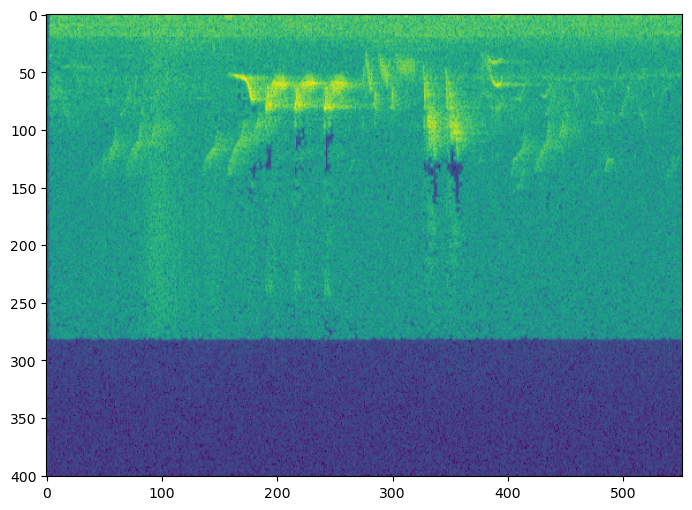

In [6]:
print(f"Shape of spectrograms: {spectrogram.size()}, Class ids: {class_id}")
plt.figure(figsize=(10, 6))
plt.imshow(spectrogram[0,:,:].numpy())

#make the sound wave availalbe
ipd.Audio(waveform.numpy(), rate=sample_rate)

In [7]:
#predict the bird class id using the classifier 
import torch.nn.functional as F

#reshape the tensor (to add the batch dimension) and move the tensor to the GPU 
input = spectrogram.unsqueeze(0).to(device)
#make the pridiction using the model (this gives the raw logists)
prediction = model(input)
# print(prediction)

#convert the raw logits to probabilities so that the classifier can give a confidence 
prediction_probs = F.softmax(prediction, dim=1)
print(prediction_probs)

tensor([[5.6766e-09, 3.6660e-08, 1.6765e-07, 3.2266e-09, 4.3957e-07, 2.0125e-10,
         5.7827e-07, 1.8013e-04, 4.5460e-09, 3.3972e-06, 2.6264e-08, 4.7002e-11,
         3.6484e-10, 6.4277e-10, 5.2677e-11, 3.7332e-07, 8.7710e-11, 7.4892e-08,
         2.0602e-05, 2.0160e-12, 1.4456e-08, 2.1588e-10, 4.4790e-11, 5.2631e-10,
         1.8407e-08, 1.0559e-05, 6.6237e-08, 1.3063e-07, 2.0805e-07, 4.0530e-08,
         2.5416e-10, 2.1714e-11, 3.0081e-11, 5.6109e-10, 3.9738e-06, 7.1959e-08,
         1.4425e-10, 1.6462e-07, 1.8418e-08, 2.5269e-06, 3.4483e-08, 3.5843e-08,
         1.9717e-11, 1.1955e-12, 5.2990e-12, 1.8636e-04, 9.2693e-08, 1.0370e-09,
         7.8818e-10, 3.4563e-09, 5.4242e-08, 1.8554e-08, 5.5571e-07, 1.1916e-07,
         3.3306e-08, 4.9405e-09, 2.9361e-06, 3.1122e-05, 1.3898e-08, 2.3122e-12,
         9.6594e-08, 2.6915e-07, 1.2438e-09, 4.3696e-09, 1.4655e-09, 4.6036e-09,
         3.4910e-09, 1.0702e-08, 1.3003e-11, 1.1355e-08, 4.7524e-08, 1.7794e-11,
         3.7127e-06, 1.6473e

In [8]:
#get the prediction as the actual name 
predicted_class_index = torch.argmax(prediction, dim=1).item()

# print(prediction[0, predicted_class_index])

#get the confidence 
prediction_confidence =  prediction_probs[0, predicted_class_index].item() 

print(f"Predicted bird name: {id_to_name_dict[predicted_class_index]}, confidence: {round(prediction_confidence*100, 3)}%")
print(f"Actual bird name: {name}")

# print(f"Predicted class_id: {predicted_class_index}, confidence: {round(prediction_confidence*100, 3)}%, actual class_id: {class_id}")
# print(f"Predicted bird name: {id_to_name_dict[predicted_class_index]}, actual bird name: {name}")

Predicted bird name: Common Redstart, confidence: 99.948%
Actual bird name: Common Redstart
